In [5]:
file_path = '/home/mukund/Projects/updatedCoffea/Coffea_Analysis/src/Scripts/BDTImplementation/Binary/QQ_vs_GG/outputs/Feb10_7/xgb_model_binary.pkl'

import joblib
import numpy as np

model = joblib.load(file_path)
X = np.random.rand(1, model.n_features_in_)
score = model.predict_proba(X)[0][1]
print("Score:", score)


Score: 0.13890328


In [3]:
!file /home/mukund/Projects/updatedCoffea/Coffea_Analysis/src/Scripts/BDTImplementation/Binary/QQ_vs_GG/outputs/Feb10_7/xgb_model_binary.pkl


/home/mukund/Projects/updatedCoffea/Coffea_Analysis/src/Scripts/BDTImplementation/Binary/QQ_vs_GG/outputs/Feb10_7/xgb_model_binary.pkl: 8086 relocatable (Microsoft)


In [48]:
# import correctionlib

# # This returns a CorrectionSet object
# cset = correctionlib.CorrectionSet.from_file("/home/mukund/Projects/SkimandSlim/NanoAODTools/muon_Z.json.gz")

# # Explore the corrections
# print("Available corrections:")
# for corr in cset:
#     print(f"- {corr}")



In [49]:
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import os
import glob

# Folder containing ROOT files
folder_path = '/mnt/disk1/skimmed_Run2/Reco/May31_met_0p1_jet_0p15/UL2016preVFP/MC_mu/ttbar_SemiLeptonic/'
file_pattern = os.path.join(folder_path, '*.root')

# Initialize lists to collect data
all_top_had_mass = []
all_top_lep_mass = []
all_genpart_mass = []
all_muon_charge = []

# Loop through files
for file_path in glob.glob(file_pattern):
    print(f"Processing: {file_path}")
    with uproot.open(file_path) as file:
        if 'Events' not in file:
            print("  Skipping: No 'Events' tree found.")
            continue

        tree = file['Events']

        # Load necessary branches
        top_had_mass = tree['Top_had_mass'].array(library='np')
        top_lep_mass = tree['Top_lep_mass'].array(library='np')
        genpart_mass = tree['GenPart_mass'].array(library='ak')
        muon_charge = tree['Muon_charge'].array(library='ak')

        # Append all data (no filtering)
        all_top_had_mass.append(top_had_mass)
        all_top_lep_mass.append(top_lep_mass)
        all_genpart_mass.append(genpart_mass)
        all_muon_charge.append(muon_charge)

# Combine arrays
top_had_mass = np.concatenate(all_top_had_mass) if all_top_had_mass else np.array([])
top_lep_mass = np.concatenate(all_top_lep_mass) if all_top_lep_mass else np.array([])
genpart_mass = ak.concatenate(all_genpart_mass) if all_genpart_mass else ak.Array([])
muon_charge = ak.concatenate(all_muon_charge) if all_muon_charge else ak.Array([])

print(f"Total events collected: {len(top_lep_mass)}")


# --- Summary for Top_had_mass ---
def print_stats(name, arr):
    if len(arr) == 0:
        print(f"{name}: No entries")
        return
    mean = np.mean(arr)
    std = np.std(arr)
    min_val = np.min(arr)
    max_val = np.max(arr)
    median = np.median(arr)
    percentiles = np.percentile(arr, [5, 25, 75, 95])
    print(f"\n{name} statistics:")
    print(f"  Entries        : {len(arr)}")
    print(f"  Mean           : {mean:.2f} GeV")
    print(f"  Std Dev        : {std:.2f} GeV")
    print(f"  Min            : {min_val:.2f} GeV")
    print(f"  5th percentile : {percentiles[0]:.2f} GeV")
    print(f"  25th percentile: {percentiles[1]:.2f} GeV")
    print(f"  Median         : {median:.2f} GeV")
    print(f"  75th percentile: {percentiles[2]:.2f} GeV")
    print(f"  95th percentile: {percentiles[3]:.2f} GeV")
    print(f"  Max            : {max_val:.2f} GeV")

# Print summaries
# print_stats("Top_had_mass", top_had_mass)
# print_stats("Top_lep_mass", top_lep_mass)

# --- Optional: Simple summaries for Awkward arrays ---
print(f"\nGenPart_mass: {ak.num(genpart_mass, axis=0).sum()} total elements")
print(f"Muon_charge : {ak.num(muon_charge, axis=0).sum()} total elements")

# # --- Plotting ---
# plt.figure(figsize=(8, 6))
# plt.hist(top_had_mass, bins=50, histtype='step', label='Top_had_mass', color='blue')
# plt.hist(top_lep_mass, bins=50, histtype='step', label='Top_lep_mass', color='red')
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events')
# plt.title('Top_had_mass and Top_lep_mass Distributions')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


Processing: /mnt/disk1/skimmed_Run2/Reco/May31_met_0p1_jet_0p15/UL2016preVFP/MC_mu/ttbar_SemiLeptonic/tree_74_Skim_Skim_Skim.root
Processing: /mnt/disk1/skimmed_Run2/Reco/May31_met_0p1_jet_0p15/UL2016preVFP/MC_mu/ttbar_SemiLeptonic/tree_56_Skim_Skim_Skim.root
Processing: /mnt/disk1/skimmed_Run2/Reco/May31_met_0p1_jet_0p15/UL2016preVFP/MC_mu/ttbar_SemiLeptonic/tree_105_Skim_Skim_Skim.root
Processing: /mnt/disk1/skimmed_Run2/Reco/May31_met_0p1_jet_0p15/UL2016preVFP/MC_mu/ttbar_SemiLeptonic/tree_28_Skim_Skim_Skim.root
Processing: /mnt/disk1/skimmed_Run2/Reco/May31_met_0p1_jet_0p15/UL2016preVFP/MC_mu/ttbar_SemiLeptonic/tree_99_Skim_Skim_Skim.root
Processing: /mnt/disk1/skimmed_Run2/Reco/May31_met_0p1_jet_0p15/UL2016preVFP/MC_mu/ttbar_SemiLeptonic/tree_59_Skim_Skim_Skim.root
Processing: /mnt/disk1/skimmed_Run2/Reco/May31_met_0p1_jet_0p15/UL2016preVFP/MC_mu/ttbar_SemiLeptonic/tree_115_Skim_Skim_Skim.root
Processing: /mnt/disk1/skimmed_Run2/Reco/May31_met_0p1_jet_0p15/UL2016preVFP/MC_mu/ttbar

In [50]:
# import uproot
# import numpy as np
# import matplotlib.pyplot as plt

# # File path and branch name
# file_path = '/home/mukund/Projects/SkimandSlim/NanoAODTools/May17/UL2016preVFP/MC_mu/ttbar_SemiLeptonic/selected_SemiLeptonic_10k_Skim.root'


# # Load the data
# with uproot.open(file_path) as file:
#     tree = file['Events']
#     branches = tree.keys()
#     # print(f"Branches in {tree_name}:")
#     # for branch in branches:
#     #     print(branch)


#     chi2_status = tree['chi_status'].array(library='np')  # NumPy array



In [51]:
gen_first_top_mass = genpart_mass[:,2]
gen_second_top_mass = genpart_mass[:,3]
gen_muon_charge = muon_charge[:,0]

In [52]:
gen_top_had_mass = []
gen_top_lep_mass = []
for i in range(len(gen_muon_charge)):
    if gen_muon_charge[i] == 1:
        gen_top_had_mass.append(gen_second_top_mass[i])
        gen_top_lep_mass.append(gen_first_top_mass[i])
    else:
        gen_top_had_mass.append(gen_first_top_mass[i])
        gen_top_lep_mass.append(gen_second_top_mass[i])

In [53]:
# plt.figure(figsize=(8, 6))
# plt.hist(gen_top_had_mass, bins=50, histtype='step', color='blue')
# plt.xlabel('Gen_Top_had_masss [GeV]')
# plt.ylabel('Events')
# plt.title('Distribution of Top_had_masss')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [54]:
# plt.figure(figsize=(8, 6))
# plt.hist(gen_top_lep_mass, bins=50, histtype='step', color='blue')
# plt.xlabel('Gen_Top_lep_masss [GeV]')
# plt.ylabel('Events')
# plt.title('Distribution of Top_had_masss')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [55]:
gen_top_had_mass_array = np.array(gen_top_had_mass)
gen_top_lep_mass_array = np.array(gen_top_lep_mass)

In [56]:
delta_top_had_mass = gen_top_had_mass_array - top_had_mass
delta_top_lep_mass = gen_top_lep_mass_array - top_lep_mass


In [57]:
# Filter delta values to be within [-100, 100]
filtered_delta_top_had_mass = delta_top_had_mass[
    (delta_top_had_mass >= -100) & (delta_top_had_mass <= 100)
]
filtered_delta_top_lep_mass = delta_top_lep_mass[
    (delta_top_lep_mass >= -100) & (delta_top_lep_mass <= 100)
]

In [58]:
# plt.figure(figsize=(8, 6))
# plt.hist(filtered_delta_top_had_mass, bins=20, histtype='step', color='blue')
# plt.xlabel('ΔTop_had_mass [GeV]')
# plt.ylabel('Events')
# plt.title('Filtered ΔTop_had_mass ∈ [−100, 100] GeV')
# plt.grid(True)
# plt.tight_layout()
# plt.show()




In [59]:
# plt.figure(figsize=(8, 6))
# plt.hist(filtered_delta_top_lep_mass, bins=20, histtype='step', color='green')
# plt.xlabel('ΔTop_lep_mass [GeV]')
# plt.ylabel('Events')
# plt.title('Filtered ΔTop_lep_mass ∈ [−100, 100] GeV')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [60]:
filtered_delta_top_lep_mass = filtered_delta_top_lep_mass + 15.0

In [61]:
# import ROOT
# import array

# # Create a histogram
# hist = ROOT.TH1F("hist", "#DeltaTop_{lep} mass (Gen mass - Reco mass)", 20, -100, 100)

# # Fill the histogram with your data
# for value in filtered_delta_top_lep_mass:
#     hist.Fill(value)

# # Set axis labels
# hist.GetXaxis().SetTitle("#DeltaTop_{lep} mass [GeV]")
# hist.GetYaxis().SetTitle("Events")

# # Style
# ROOT.gStyle.SetOptStat(0)  # Disable stats box
# hist.SetLineColor(ROOT.kGreen + 2)
# hist.SetLineWidth(2)

# # Create a canvas and draw
# c = ROOT.TCanvas("c", "", 800, 600)
# hist.Draw("HIST")

# # Add grid lines
# c.SetGrid()

# # Save or show the canvas
# c.Draw()
# # c.SaveAs("delta_top_lep_mass.png")  # Optional


Success
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       359978
NDf                       =           16
Edm                       =  2.85048e-09
NCalls                    =           58
Constant                  =  1.92597e+06   +/-   756.238     
Mean                      =      1.18891   +/-   0.00710927  
Sigma                     =      19.9478   +/-   0.00455227   	 (limited)


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S


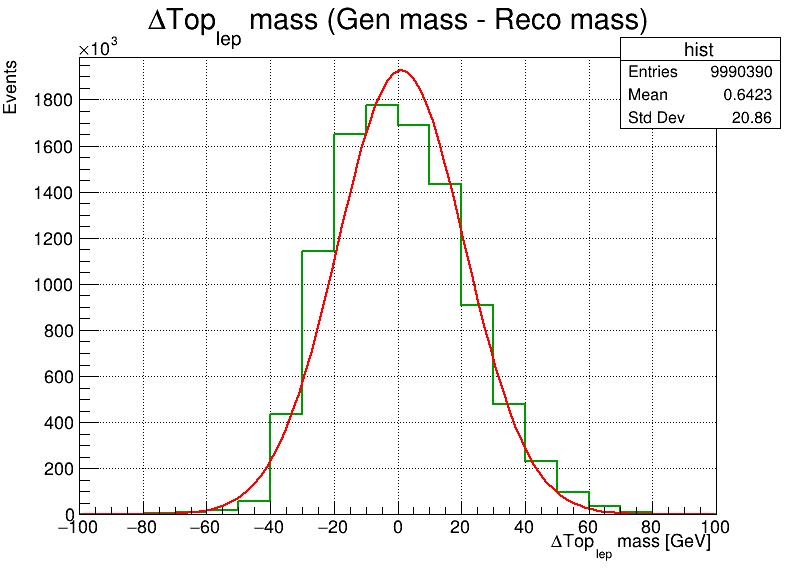

In [62]:
import ROOT
import array

# Create a histogram
hist = ROOT.TH1F("hist", "#DeltaTop_{lep} mass (Gen mass - Reco mass)", 20, -100, 100)

# Fill the histogram with your data
for value in filtered_delta_top_lep_mass:
    hist.Fill(value)

# Set axis labels
hist.GetXaxis().SetTitle("#DeltaTop_{lep} mass [GeV]")
hist.GetYaxis().SetTitle("Events")

# Style
ROOT.gStyle.SetOptStat(1111)  # Show stats box with fit info
hist.SetLineColor(ROOT.kGreen + 2)
hist.SetLineWidth(2)

# Create canvas
c = ROOT.TCanvas("c", "", 800, 600)
c.SetGrid()

# Fit and automatically draw the Gaussian on same canvas
fit_result = hist.Fit("gaus")  # Don't use "S" here unless you redraw the function manually

# Optional: Print fit parameters
if fit_result:
    print("Success")

# Draw canvas
c.Draw()
# c.SaveAs("delta_top_lep_mass_fit.png")



Success
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =        46759
NDf                       =           17
Edm                       =  3.42014e-07
NCalls                    =           55
Constant                  =  2.23079e+06   +/-   862.472     
Mean                      =     -4.45859   +/-   0.00563972  
Sigma                     =      17.7852   +/-   0.00393347   	 (limited)


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S


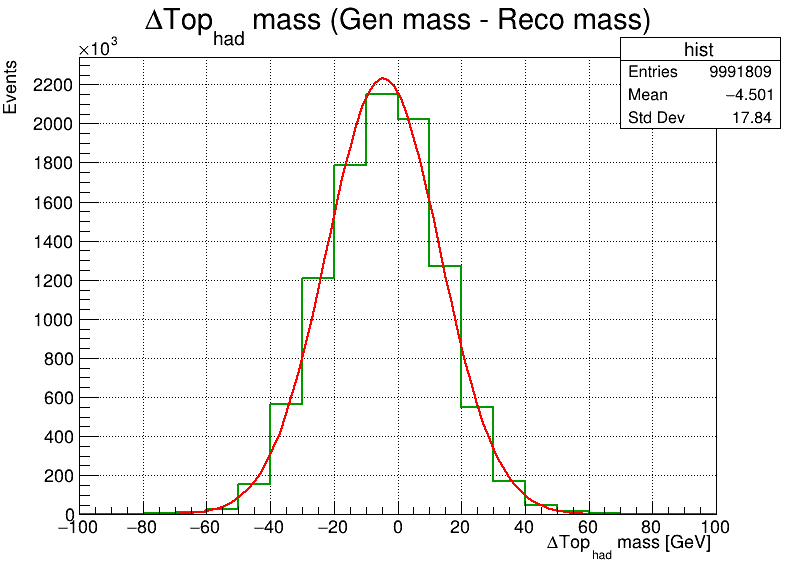

In [63]:
import ROOT
import array

# Create a histogram
hist = ROOT.TH1F("hist", "#DeltaTop_{had} mass (Gen mass - Reco mass)", 20, -100, 100)

# Fill the histogram with your data
for value in filtered_delta_top_had_mass:
    hist.Fill(value)

# Set axis labels
hist.GetXaxis().SetTitle("#DeltaTop_{had} mass [GeV]")
hist.GetYaxis().SetTitle("Events")

# Style
ROOT.gStyle.SetOptStat(1111)  # Show stats box with fit info
hist.SetLineColor(ROOT.kGreen + 2)
hist.SetLineWidth(2)

# Create canvas
c = ROOT.TCanvas("c", "", 800, 600)
c.SetGrid()

# Fit and automatically draw the Gaussian on same canvas
fit_result = hist.Fit("gaus")  # Don't use "S" here unless you redraw the function manually

# Optional: Print fit parameters
if fit_result:
    print("Success")

# Draw canvas
c.Draw()
# c.SaveAs("delta_top_lep_mass_fit.png")


In [64]:
# plt.figure(figsize=(8, 6))
# plt.hist(delta_top_had_mass, bins=500, histtype='step', color='blue')
# plt.xlabel('Delta_Top_had_mass [GeV]')
# plt.ylabel('Events')
# plt.xlim(-100, 100)
# plt.title('Distribution of Delta_Top_had_mass')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [65]:
# plt.figure(figsize=(8, 6))
# plt.hist(delta_top_lep_mass, bins=500000, histtype='step', color='blue')
# plt.xlabel('Delta_Top_lep_mass [GeV]')
# plt.ylabel('Events')
# plt.xlim(-100, 100)
# plt.title('Distribution of Delta_Top_lep_mass')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [66]:
# import uproot
# import awkward as ak

# # Path to your large NanoAOD file
# input_file = "/mnt/disk1/skimmed_Run2/selection/April052025/UL2016preVFP/MC_mu/ttbar_SemiLeptonic/tree_22_Skim_Skim.root"
# output_file = "/home/mukund/Projects/SkimandSlim/NanoAODTools/selected_SemiLeptonic_10k.root"
# tree_name = "Events"

# # Open the input file
# with uproot.open(f"{input_file}:{tree_name}") as tree:
#     # Get list of branches (or specify them manually)
#     branches = tree.keys()
#     print(f"Branches in {tree_name}:")
#     for branch in branches:
#         print(branch)
#     # arrays = tree.arrays(branches, entry_stop=10000)

# # Convert to dict of {branch_name: array}
# # branch_dict = {key: arrays[key] for key in arrays.fields}

# # # Use uproot to create the output file with correct branch interpretation
# # with uproot.recreate(output_file) as f:
# #     f.mktree(tree_name, {key: branch_dict[key].type for key in branch_dict})
# #     f[tree_name].extend(branch_dict)

# # print(f"Skimmed file saved as: {output_file}")


In [67]:

# # --- Construct reco 4-vectors ---
# lep_top = vector.array({
#     "pt": top_lep_pt,
#     "eta": top_lep_eta,
#     "phi": top_lep_phi,
#     "mass": top_lep_mass
# })

# had_top = vector.array({
#     "pt": top_had_pt,
#     "eta": top_had_eta,
#     "phi": top_had_phi,
#     "mass": top_had_mass
# })

# reco_ttbar = lep_top + had_top
# reco_ttbar_mass = reco_ttbar.mass

# # --- Construct gen 4-vectors ---
# vec_genpart = vector.array({
#     "pt": genpart_pt,
#     "eta": genpart_eta,
#     "phi": genpart_phi,
#     "mass": genpart_mass
# })

# # Assumes index 2,3 are gen tops (adjust if needed)
# gen_first_top = vec_genpart[:, 2]
# gen_second_top = vec_genpart[:, 3]

# # Use muon charge to decide which is lep/had
# gen_top_lep = ak.where(muon_charge == 1, gen_first_top, gen_second_top)
# gen_top_had = ak.where(muon_charge == 1, gen_second_top, gen_first_top)

# gen_ttbar = gen_top_lep + gen_top_had
# gen_ttbar_mass = ak.to_numpy(gen_ttbar.mass)

# # --- Match lengths ---
# min_len = min(len(reco_ttbar_mass), len(gen_ttbar_mass))
# reco_ttbar_mass = reco_ttbar_mass[:min_len]
# gen_ttbar_mass = gen_ttbar_mass[:min_len]

# # --- Plot ---
# plt.figure(figsize=(8, 6))
# plt.hist(gen_ttbar_mass, bins=100, histtype='step', label='Gen tt̄ mass', color='green')
# plt.hist(reco_ttbar_mass, bins=100, histtype='step', label='Reco tt̄ mass', color='blue')
# plt.xlabel('tt̄ invariant mass [GeV]')
# plt.ylabel('Events')
# plt.title('Reco vs Gen tt̄ Mass Distribution')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # --- Optional: mass resolution ---
# delta_mass = reco_ttbar_mass - gen_ttbar_mass
# plt.figure(figsize=(8, 6))
# plt.hist(delta_mass, bins=200, histtype='step', color='black')
# plt.xlabel('Reco - Gen tt̄ Mass [GeV]')
# plt.ylabel('Events')
# plt.title('tt̄ Mass Resolution (Reco - Gen)')
# plt.grid(True)
# plt.tight_layout()
# plt.show()
